In [73]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
from scipy import stats
from sklearn.svm import SVC
import numpy as np
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn import metrics
from mlxtend.plotting import plot_learning_curves, plot_decision_regions

In [74]:
red = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 2/red.csv'
white = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 2/white.csv'

red = pd.read_csv(red)
white = pd.read_csv(white)

red.drop(['Unnamed: 0', 'wine'], axis = 1, inplace = True)
white.drop(['Unnamed: 0', 'wine'], axis = 1, inplace = True)

In [72]:
white.shape

(4898, 12)

In [3]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [69]:
output_data = []
select_col = red.drop(['quality', 'density'], axis = 1).columns

df = white
for i in select_col:
    col_skewness = round(df[i].skew(), 2)
    col_kurtosis = round(df[i].kurt(), 2)

    log_skewness = round(np.log1p(df[i]).skew(), 2)
    log_kurtosis = round(np.log1p(df[i]).kurt(), 2)

    transformed_data, lambda_value = stats.yeojohnson(df[i])
    yeojohnson_skewness = round(stats.skew(transformed_data), 2)
    yeojohnson_kurtosis = round(stats.kurtosis(transformed_data), 2)
    
    output_data.append({
        'Column': i,
        'Skewness': col_skewness,
        'Kurtosis': col_kurtosis,

        'Log Transform Skewness': log_skewness,
        'Log Transform Kurtosis': log_kurtosis,
        
        'Yeo-Johnson Skewness': yeojohnson_skewness,
        'Yeo-Johnson Kurtosis': yeojohnson_kurtosis
    })

output_df = pd.DataFrame(output_data)
output_df

,Column,Skewness,Kurtosis,Log Transform Skewness,Log Transform Kurtosis,Yeo-Johnson Skewness,Yeo-Johnson Kurtosis
0,fixed acidity,0.65,2.17,0.15,0.98,-0.01,0.91
1,volatile acidity,1.58,5.09,1.14,2.72,0.01,-0.06
2,citric acid,1.28,6.17,0.61,2.90,-0.07,2.13
3,residual sugar,1.08,3.47,0.00,-1.37,0.00,-1.37
4,chlorides,5.02,37.56,4.63,32.05,-0.07,1.09
5,free sulfur dioxide,1.41,11.47,-0.83,1.12,0.03,0.74
6,total sulfur dioxide,0.39,0.57,-0.95,3.23,0.02,0.27
7,pH,0.46,0.53,0.34,0.35,-0.00,0.11
8,sulphates,0.98,1.59,0.71,0.81,0.01,-0.10
9,alcohol,0.49,-0.70,0.33,-0.88,0.06,-1.03


In [75]:
select_col = red.drop(['quality', 'density'], axis = 1).columns

df = [red, white]
for d in df:
    for i in select_col:
        d[i], lambda_value = stats.yeojohnson(d[i])

In [76]:
for i in select_col:
    print(f"{i} Skewness:", round(red[i].skew(), 2))
    print(f"{i} Kurtosis:", round(red[i].kurt(), 2))
    print("=======================")

print("=======================")

for i in select_col:
    print(f"{i} Skewness:", round(white[i].skew(), 2))
    print(f"{i} Kurtosis:", round(white[i].kurt(), 2))
    print("=======================")

fixed acidity Skewness: 0.0
fixed acidity Kurtosis: 0.04
volatile acidity Skewness: 0.0
volatile acidity Kurtosis: -0.13
citric acid Skewness: 0.02
citric acid Kurtosis: -1.08
residual sugar Skewness: -0.02
residual sugar Kurtosis: 0.94
chlorides Skewness: -0.15
chlorides Kurtosis: 3.3
free sulfur dioxide Skewness: -0.01
free sulfur dioxide Kurtosis: -0.67
total sulfur dioxide Skewness: -0.0
total sulfur dioxide Kurtosis: -0.69
pH Skewness: -0.0
pH Kurtosis: 0.66
sulphates Skewness: 0.01
sulphates Kurtosis: 0.08
alcohol Skewness: 0.11
alcohol Kurtosis: -0.93
fixed acidity Skewness: -0.01
fixed acidity Kurtosis: 0.91
volatile acidity Skewness: 0.01
volatile acidity Kurtosis: -0.05
citric acid Skewness: -0.07
citric acid Kurtosis: 2.14
residual sugar Skewness: 0.0
residual sugar Kurtosis: -1.37
chlorides Skewness: -0.07
chlorides Kurtosis: 1.09
free sulfur dioxide Skewness: 0.03
free sulfur dioxide Kurtosis: 0.74
total sulfur dioxide Skewness: 0.02
total sulfur dioxide Kurtosis: 0.27
pH 

In [ ]:
red.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [ ]:
white.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

# Grid Search CV

In [77]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
model = SVC()

red.index.set_names(['red'], inplace = True)
white.index.set_names(['white'], inplace = True)

for d in df:
    X = d.drop(['quality', 'density'], axis = 1)
    y = d.quality

    params = {
        'C': np.logspace(-3, 3, num = 7, base = 10),
        'kernel': ['rbf', 'sigmoid'],
        'gamma': np.logspace(-3, 3, num = 7, base = 10),  
    }

    grid_search = GridSearchCV(model, param_grid = params, cv = kf)
    grid_search.fit(X, y)

    print(f"Best parameters for {d.index.name}:", grid_search.best_params_)
    print(f"Best score for {d.index.name}:", grid_search.best_score_)

Best parameters for red: {'C': 10.0, 'gamma': 100.0, 'kernel': 'rbf'}
Best score for red: 0.6034933385579937
Best parameters for white: {'C': 1.0, 'gamma': 100.0, 'kernel': 'rbf'}
Best score for white: 0.6192289091326009


# Model

In [22]:
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(red.drop(['quality', 'density'], axis = 1), red.quality, shuffle = True, random_state = 42)

scl = StandardScaler()
x_train_red = scl.fit_transform(x_train_red)
x_test_red = scl.transform(x_test_red)

In [55]:
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(white.drop(['quality', 'density'], axis = 1), white.quality, shuffle = True, random_state = 42)

scl = StandardScaler()
x_train_white = scl.fit_transform(x_train_white)
x_test_white = scl.transform(x_test_white)

## Red wine

[10/10] features ████████████████████ Time elapsed: 0 seconds

Text(0.5, 1.0, 'Feature importance Before SMOTE')

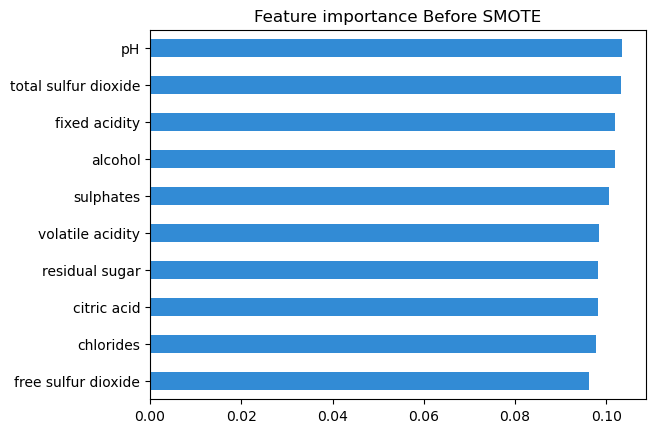

In [26]:
clf = SVC(probability = True, C = 10, gamma = 100, kernel = 'rbf')
model = clf.fit(x_train_red, y_train_red)
y_pred_red = model.predict(x_test_red)

interpreter = Interpretation(
    x_test_red, feature_names = red.drop(['quality', 'density'], axis = 1).columns
)

pyint_model = InMemoryModel(
            clf.predict_proba,
            examples = x_train_red
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance Before SMOTE')

In [27]:
acu = metrics.accuracy_score(y_test_red, y_pred_red)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_red, y_pred_red, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = list(range(3, 9))

cm = metrics.confusion_matrix(y_test_red, y_pred_red, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  52.5 %
Precision: 73.2444 %
Recall: 52.5 %
f1: 44.8806 %


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,3,4,5,6,7,8
3,0.0,0.0,1.000000,0.000000,0.000000,0.0
4,0.0,0.0,1.000000,0.000000,0.000000,0.0
5,0.0,0.0,1.000000,0.000000,0.000000,0.0
6,0.0,0.0,0.804734,0.195266,0.000000,0.0
7,0.0,0.0,0.729167,0.000000,0.270833,0.0
8,0.0,0.0,1.000000,0.000000,0.000000,0.0


In [28]:
labels = list(range(3, 9))

fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix before SMOTE',
            'font': {'size': 40, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20, 'family': 'Gulliver'},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20, 'family': 'Gulliver'},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

In [29]:
y_pred_proba = model.predict_proba(x_test_red)

y_test_bin = label_binarize(y_test_red, classes = model.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fig = go.Figure()
class_names = ["3", "4", "5", "6", "7", "8"]

for i in range(len(class_names)):
    fig.add_trace(
        go.Scatter(
            x = fpr[i], y = tpr[i],
            mode = 'lines',
            line = dict(width = 2),
            name = 'ROC curve of class {} (AUC = {:.2f})'.format(class_names[i], roc_auc[i])
        )
    )

fig.add_trace(
    go.Scatter(
        x = [0, 1], y = [0, 1],
        mode = 'lines',
        line = dict(color = 'navy', width = 2, dash = 'dash'),
        showlegend = False
    )
)

fig.update_layout(
    title = {
        'text': 'ROC Curves before SMOTE',
        'x': 0.5,
        'font': {
            'size': 40, 'family': 'Gulliver'
        }
    },
    xaxis_title = {
        'text': 'False Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    yaxis_title = {
        'text': 'True Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    width = 1200, height = 800,
    legend = dict(x = 0.7, y = 0.1),
)

fig.show()

---

## White wine

[10/10] features ████████████████████ Time elapsed: 5 seconds

Text(0.5, 1.0, 'Feature importance Before SMOTE')

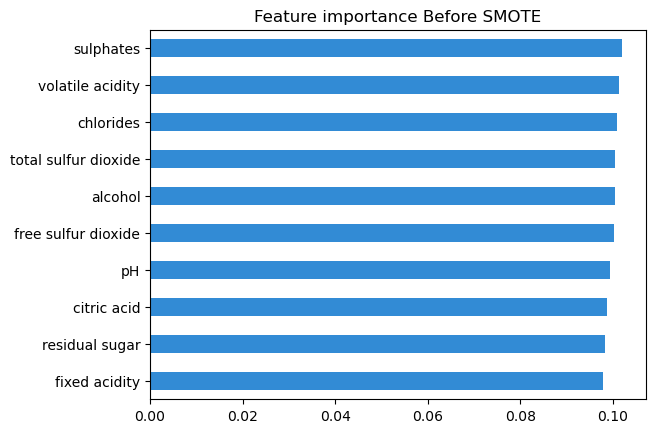

In [56]:
clf = SVC(probability = True, C = 1, gamma = 100, kernel = 'rbf')
model = clf.fit(x_train_white, y_train_white)
y_pred_white = model.predict(x_test_white)

interpreter = Interpretation(
    x_test_white, feature_names = white.drop(['quality', 'density'], axis = 1).columns
)

pyint_model = InMemoryModel(
            clf.predict_proba,
            examples = x_train_white
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance Before SMOTE') 

In [58]:
acu = metrics.accuracy_score(y_test_white, y_pred_white)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_white, y_pred_white, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = list(range(3, 9))

cm = metrics.confusion_matrix(y_test_white, y_pred_white, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  61.1429 %
Precision: 78.7048 %
Recall: 61.1429 %
f1: 56.2975 %


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,3,4,5,6,7,8
3,0.0,0.00000,0.000000,1.000000,0.000000,0.000000
4,0.0,0.03125,0.000000,0.968750,0.000000,0.000000
5,0.0,0.00000,0.296089,0.703911,0.000000,0.000000
6,0.0,0.00000,0.000000,1.000000,0.000000,0.000000
7,0.0,0.00000,0.000000,0.651452,0.348548,0.000000
8,0.0,0.00000,0.000000,0.674419,0.000000,0.325581


In [59]:
labels = list(range(3, 9))

fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix before SMOTE',
            'font': {'size': 40, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20, 'family': 'Gulliver'},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20, 'family': 'Gulliver'},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

In [60]:
y_pred_proba = model.predict_proba(x_test_white)

y_test_bin = label_binarize(y_test_white, classes = model.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fig = go.Figure()
class_names = ["3", "4", "5", "6", "7", "8", "9"]

for i in range(len(class_names)):
    fig.add_trace(
        go.Scatter(
            x = fpr[i], y = tpr[i],
            mode = 'lines',
            line = dict(width = 2),
            name = 'ROC curve of class {} (AUC = {:.2f})'.format(class_names[i], roc_auc[i])
        )
    )

fig.add_trace(
    go.Scatter(
        x = [0, 1], y = [0, 1],
        mode = 'lines',
        line = dict(color = 'navy', width = 2, dash = 'dash'),
        showlegend = False
    )
)

fig.update_layout(
    title = {
        'text': 'ROC Curves before SMOTE',
        'x': 0.5,
        'font': {
            'size': 40, 'family': 'Gulliver'
        }
    },
    xaxis_title = {
        'text': 'False Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    yaxis_title = {
        'text': 'True Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    width = 1200, height = 800,
    legend = dict(x = 0.7, y = 0.1),
)

fig.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



---

## Upsample By SMOTE

In [85]:
smt = SMOTE(sampling_strategy = 'auto')

X = red.drop(['quality', 'density'], axis = 1)
y = red.quality
X, y = smt.fit_resample(X, y)

x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(X, y, shuffle = True, random_state = 42)

In [86]:
model = SVC()

params = {
        'C': np.logspace(-3, 3, num = 7, base = 10),
        'kernel': ['rbf', 'sigmoid'],
        'gamma': np.logspace(-3, 3, num = 7, base = 10),  
    }

grid_search = GridSearchCV(model, param_grid = params, cv = kf, n_jobs = -1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 1000.0, 'gamma': 10.0, 'kernel': 'rbf'}
Best score: 0.8404290848802795


In [88]:
smt = SMOTE(sampling_strategy = 'auto', k_neighbors = 3)

X = white.drop(['quality', 'density'], axis = 1)
y = white.quality
X, y = smt.fit_resample(X, y)

x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(X, y, shuffle = True, random_state = 42)

In [89]:
model = SVC()

params = {
        'C': np.logspace(-3, 3, num = 7, base = 10),
        'kernel': ['rbf', 'sigmoid'],
        'gamma': np.logspace(-3, 3, num = 7, base = 10),  
    }

grid_search = GridSearchCV(model, param_grid = params, cv = kf, n_jobs = -1)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 1000.0, 'gamma': 1.0, 'kernel': 'rbf'}
Best score: 0.8793708503616194


In [84]:
y.value_counts()

6    2198
5    2198
7    2198
8    2198
4    2198
3    2198
9    2198
Name: quality, dtype: int64

[10/10] features ████████████████████ Time elapsed: 1 seconds

Text(0.5, 1.0, 'Feature importance After SMOTE')

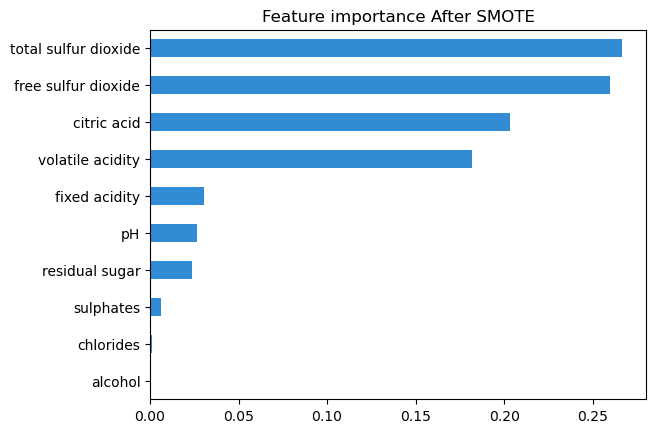

In [16]:
clf = SVC(probability = True, C = 10, gamma = 100, kernel = 'rbf')
model = clf.fit(x_train_red, y_train_red)
y_pred_red = model.predict(x_test_red)

interpreter = Interpretation(
    x_test_red, feature_names = red.drop(['quality', 'density'], axis = 1).columns
)

pyint_model = InMemoryModel(
            clf.predict_proba,
            examples = x_train_red
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance After SMOTE')

In [13]:
# clf = SVC(probability = True)
# pca = PCA(n_components = 2)

# x_train_pca = pca.fit_transform(x_train_red)
# x_test_pca = pca.transform(x_test_red)

# plot_decision_regions(x_train_pca, y_train_red.values, clf = clf.fit(x_train_pca, y_train_red.values))
# plt.title('Decision Region')
# plt.show()

In [14]:
# clf = SVC(probability = True)
# pca = PCA(n_components = 2)

# x_train_pca = pca.fit_transform(x_train_white)
# x_test_pca = pca.transform(x_test_white)

# plot_decision_regions(x_train_pca, y_train_white.values, clf = clf.fit(x_train_pca, y_train_white.values))
# plt.title('Decision Region')
# plt.show()

In [ ]:
acu = metrics.accuracy_score(y_test_red, y_pred_red)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_red, y_pred_red, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = list(range(3, 9))

cm = metrics.confusion_matrix(y_test_red, y_pred_red, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  82.3875 %
Precision: 81.8389 %
Recall: 82.3875 %
f1: 81.8673 %


,3,4,5,6,7,8
3,0.969697,0.000000,0.006061,0.024242,0.000000,0.000000
4,0.000000,0.933333,0.036364,0.024242,0.006061,0.000000
5,0.016216,0.043243,0.735135,0.167568,0.027027,0.010811
6,0.025907,0.041451,0.264249,0.523316,0.098446,0.046632
7,0.000000,0.006803,0.020408,0.034014,0.911565,0.027211
8,0.000000,0.000000,0.017964,0.023952,0.017964,0.940120


In [ ]:
fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix after SMOTE',
            'font': {'size': 40, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20, 'family': "Gulliver"},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20, 'family': "Gulliver"},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

### ROC for Red wine

In [ ]:
y_pred_proba = model.predict_proba(x_test_red)

y_test_bin = label_binarize(y_test_red, classes = model.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fig = go.Figure()
class_names = ["3", "4", "5", "6", "7", "8"]

for i in range(len(class_names)):
    fig.add_trace(
        go.Scatter(
            x = fpr[i], y = tpr[i],
            mode = 'lines',
            line = dict(width = 2),
            name = 'ROC curve of class {} (AUC = {:.2f})'.format(class_names[i], roc_auc[i])
        )
    )

fig.add_trace(
    go.Scatter(
        x = [0, 1], y = [0, 1],
        mode = 'lines',
        line = dict(color = 'navy', width = 2, dash = 'dash'),
        showlegend = False
    )
)

fig.update_layout(
    title = {
        'text': 'ROC Curves after SMOTE',
        'x': 0.5,
        'font': {
            'size': 40, 'family': 'Gulliver'
        }
    },
    xaxis_title = {
        'text': 'False Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    yaxis_title = {
        'text': 'True Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    width = 1200, height = 800,
    legend = dict(x = 0.7, y = 0.1),
)

fig.show()

### Model Complexity

In [66]:
C_range = np.logspace(-3, 3, num = 7, base = 10)
gamma_range = np.logspace(-3, 3, num = 7, base = 10)

train_errors = np.zeros((len(C_range), len(gamma_range)))
test_errors = np.zeros((len(C_range), len(gamma_range)))

for i, C in enumerate(C_range):
    for j, gamma in enumerate(gamma_range):
        svm = SVC(C = C, gamma = gamma)
        svm.fit(x_train_red, y_train_red)
        train_pred = svm.predict(x_train_red)
        test_pred = svm.predict(x_test_red)
        train_errors[i, j] = 1 - accuracy_score(y_train_red, train_pred)
        test_errors[i, j] = 1 - accuracy_score(y_test_red, test_pred)

C, gamma = np.meshgrid(C_range, gamma_range)

fig = go.Figure(
    data = [go.Surface(
                x = C, y = gamma, z = train_errors.T, 
                colorscale = 'Blues', opacity = 0.8, name = 'Train Error'
            ),
            go.Surface(
                x = C, y = gamma, z = test_errors.T, 
                colorscale  ='Reds', opacity = 0.8, name = 'Test Error'
                )
            ],
            layout = go.Layout(
                title = {
                    'text': 'Model Complexity for SVC',
                    'font': {
                        'size': 32, 'family': 'Gulliver'
                    }, 
                    'x': 0.5
                },
                scene = dict(
                        xaxis = dict(title = 'C', type = 'log'),
                        yaxis = dict(title = 'Gamma', type = 'log'),
                        zaxis = dict(title = 'Error', type = 'linear'),
                        aspectratio = dict(x = 1, y = 1, z = 0.5),
                        camera = dict(eye = dict(x = -1.5, y = -1.5, z = 0.5)),
                        ),
                margin = dict(l = 0, r = 0, b = 0, t = 80),
                legend = dict(x = 0, y = 1, bgcolor = 'rgba(255, 255, 255, 0.5)'),
            )
)

fig.show()

---

## White wine

In [62]:
clf = SVC(probability = True, C = 1, gamma = 100, kernel = 'rbf')
model = clf.fit(x_train_white, y_train_white)
y_pred_white = model.predict(x_test_white)

interpreter = Interpretation(
    x_test_white, feature_names = white.drop(['quality', 'density'], axis = 1).columns
)

pyint_model = InMemoryModel(
            clf.predict_proba,
            examples = x_train_white
        )

plots = interpreter.feature_importance.plot_feature_importance(pyint_model, ascending = False, progressbar = True)
plt.title('Feature importance After SMOTE')

In [35]:
acu = metrics.accuracy_score(y_test_white, y_pred_white)
pre_class, r_class, f_class, sup = metrics.precision_recall_fscore_support(y_test_white, y_pred_white, average = 'weighted')

print("Acurracy: ", round(acu * 100, 4), '%')
print('Precision:', round(pre_class * 100, 4), '%')
print('Recall:', round(r_class * 100, 4), '%')
print('f1:', round(f_class * 100, 4), '%')

labels = list(range(3, 10))
cm = metrics.confusion_matrix(y_test_white, y_pred_white, labels = labels)
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm_norm = pd.DataFrame(cm_norm, index = labels, columns = labels)
cm_norm

Acurracy:  78.2168 %
Precision: 89.8805 %
Recall: 78.2168 %
f1: 80.4739 %


,3,4,5,6,7,8,9
3,0.773333,0.000000,0.003810,0.222857,0.000000,0.000000,0.000000
4,0.000000,0.724771,0.001835,0.269725,0.001835,0.001835,0.000000
5,0.000000,0.001751,0.527145,0.467601,0.001751,0.000000,0.001751
6,0.001742,0.001742,0.015679,0.968641,0.010453,0.000000,0.001742
7,0.000000,0.000000,0.001832,0.300366,0.694139,0.003663,0.000000
8,0.000000,0.001812,0.000000,0.177536,0.001812,0.818841,0.000000
9,0.000000,0.000000,0.000000,0.022472,0.000000,0.003745,0.973783


In [36]:
fig = go.Figure(
    data = go.Heatmap(
        z = cm_norm,
        x = labels,
        y = labels,
        zmin = 0,
        zmax = 1,
        colorscale = [
            [0, 'blue'],
            [1, 'red']
        ],
        text = cm_norm.values.round(2)
    ),
    layout = go.Layout(
        title = {
            'text': 'Confusion matrix after SMOTE',
            'font': {'size': 40, 'family': "Gulliver"},
            'x': 0.5
        },
        yaxis_title = {
            'font': {'size': 20, 'family': "Gulliver"},
            'text': 'Actual'
        },
        xaxis_title = {
            'font': {'size': 20, 'family': "Gulliver"},
            'text': 'Predicted'
        },
        width = 600,
        height = 600
    )
)

fig.update_xaxes(tickfont=dict(size = 16))
fig.update_yaxes(tickfont=dict(size = 16))

fig.show()

### ROC for Red wine

In [38]:
y_pred_proba = model.predict_proba(x_test_white)

y_test_bin = label_binarize(y_test_white, classes = model.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

fig = go.Figure()
class_names = ["3", "4", "5", "6", "7", "8", "9"]

for i in range(len(class_names)):
    fig.add_trace(
        go.Scatter(
            x = fpr[i], y = tpr[i],
            mode = 'lines',
            line = dict(width = 2),
            name = 'ROC curve of class {} (AUC = {:.2f})'.format(class_names[i], roc_auc[i])
        )
    )

fig.add_trace(
    go.Scatter(
        x = [0, 1], y = [0, 1],
        mode = 'lines',
        line = dict(color = 'navy', width = 2, dash = 'dash'),
        showlegend = False
    )
)

fig.update_layout(
    title = {
        'text': 'ROC Curves after SMOTE',
        'x': 0.5,
        'font': {
            'size': 40, 'family': 'Gulliver'
        }
    },
    xaxis_title = {
        'text': 'False Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    yaxis_title = {
        'text': 'True Positive Rate',
        'font': {
            'size': 24, 'family': 'Gulliver'
        }
    },
    width = 1200, height = 800,
    legend = dict(x = 0.7, y = 0.1),
)

fig.show()

### Model Complexity

In [63]:
C_range = np.logspace(-3, 3, num = 7, base = 10)
gamma_range = np.logspace(-3, 3, num = 7, base = 10)

train_errors = np.zeros((len(C_range), len(gamma_range)))
test_errors = np.zeros((len(C_range), len(gamma_range)))

for i, C in enumerate(C_range):
    for j, gamma in enumerate(gamma_range):
        svm = SVC(C = C, gamma = gamma)
        svm.fit(x_train_white, y_train_white)
        train_pred = svm.predict(x_train_white)
        test_pred = svm.predict(x_test_white)
        train_errors[i, j] = 1 - accuracy_score(y_train_white, train_pred)
        test_errors[i, j] = 1 - accuracy_score(y_test_white, test_pred)

C, gamma = np.meshgrid(C_range, gamma_range)

fig = go.Figure(
    data = [go.Surface(
                x = C, y = gamma, z = train_errors.T, 
                colorscale = 'Blues', opacity = 0.8, name = 'Train Error'
            ),
            go.Surface(
                x = C, y = gamma, z = test_errors.T, 
                colorscale  ='Reds', opacity = 0.8, name = 'Test Error'
                )
            ],
            layout = go.Layout(
                title = {
                    'text': 'Model Complexity for SVC',
                    'font': {
                        'size': 32, 'family': 'Gulliver'
                    }, 
                    'x': 0.5
                },
                scene = dict(
                        xaxis = dict(title = 'C', type = 'log'),
                        yaxis = dict(title = 'Gamma', type = 'log'),
                        zaxis = dict(title = 'Error', type = 'linear'),
                        aspectratio = dict(x = 1, y = 1, z = 0.5),
                        camera = dict(eye = dict(x = -1.5, y = -1.5, z = 0.5)),
                        ),
                margin = dict(l = 0, r = 0, b = 0, t = 80),
                legend = dict(x = 0, y = 1, bgcolor = 'rgba(255, 255, 255, 0.5)'),
            )
)

fig.show()